# PHASE I : Exploration

<hr/>

## I. Importation des Librairies utiles
<p>Plusieurs librairies sont utiles tout au long de l'étude. Elles sont importées dans cette section.</p>

In [1]:
# librairies pour ne pas afficher les warning
import warnings
warnings.filterwarnings('ignore')

# librairies pour les graphes
%pylab  inline
import seaborn as sns

# librairies pour les analyses
import pandas as pd

# autres librairies
import glob
import gc

Populating the interactive namespace from numpy and matplotlib


<hr/>

## II. Describe folder

In [2]:
def data_describe(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        data = pd.read_csv(file)
        data_dict[file] = [data.shape[0], 
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict, 
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 
                                                              'object_dtype','float_dtype', 'int_dtype', 
                                                              'bool_dtype', 'MB_Memory'], 
                                                   orient='index')
    gc.collect()
    print("SUMMARY FILES…")
    return(comparative_table)


In [3]:
#Data description
data_describe(folder = glob.glob('../Dataset/*.csv'))

SUMMARY FILES…


,Rows,Columns,%NaN,%Duplicate,object_dtype,float_dtype,int_dtype,bool_dtype,MB_Memory
../Dataset/sample_submission.csv,48744,2,0.00,0.0,0,1,1,0,0.744
../Dataset/bureau.csv,1716428,17,13.50,0.0,3,8,6,0,222.620
../Dataset/HomeCredit_columns_description.csv,219,5,12.15,0.0,4,0,1,0,0.008
../Dataset/application_train.csv,307511,122,24.40,0.0,16,65,41,0,286.227
../Dataset/credit_card_balance.csv,3840312,23,6.65,0.0,1,15,7,0,673.883
../Dataset/POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0,610.435
../Dataset/installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0,830.408
../Dataset/previous_application.csv,1670214,37,17.98,0.0,16,15,6,0,471.481
../Dataset/application_test.csv,48744,121,23.81,0.0,16,65,40,0,44.998
../Dataset/bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0,624.846


<hr/>

## III. Exploration

In [4]:
application = pd.read_csv('../Dataset/application_train.csv')

In [5]:
def plot_stat(data,feature,title,target=False) : 
    ax, fig = plt.subplots(figsize=(20,5)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index,alpha=.75)
    if target:
        data_target = data[data['TARGET'] == 1]
        ax = sns.countplot(y=feature, data=data_target, order=data_target[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=15)
    show()

In [6]:
def plot_dist(data,feature,title):
    plt.figure(figsize=(20,6))
    sns.kdeplot(data[data['TARGET'] == 0][feature], label="TARGET = 0")
    sns.kdeplot(data[data['TARGET'] == 1][feature], label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    show()

* <strong>Distribution des crédits (refus / accord)</strong>

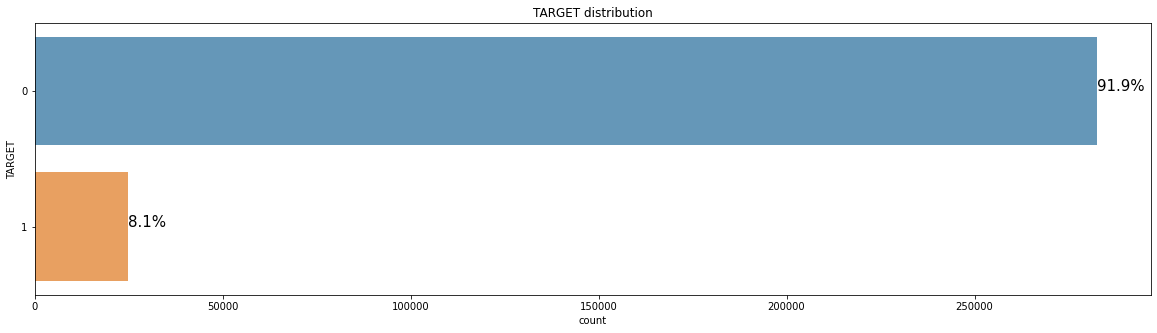

In [7]:
plot_stat(data=application,feature='TARGET',title="TARGET distribution")

* <strong>Sexe des clients (tous / credit accordé)</strong>

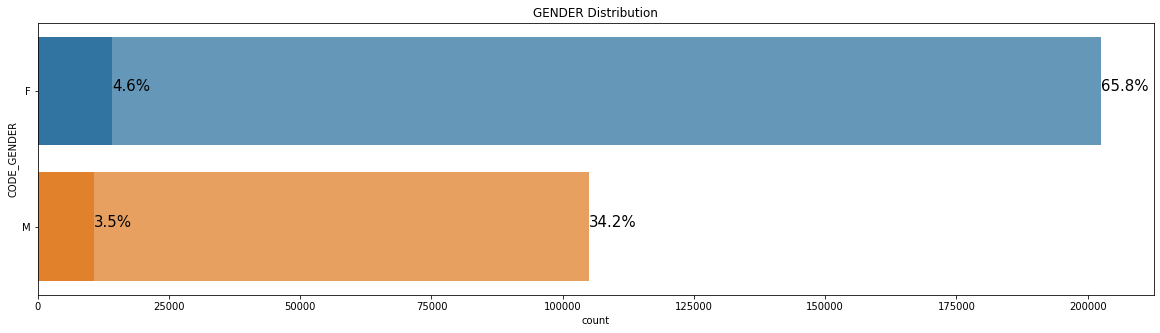

In [8]:
plot_stat(data=application,feature='CODE_GENDER',title="GENDER Distribution",target=True)

* <strong>Age des clients (tous / credit accordé)</strong>

Text(0.5, 1.0, 'Age of client')

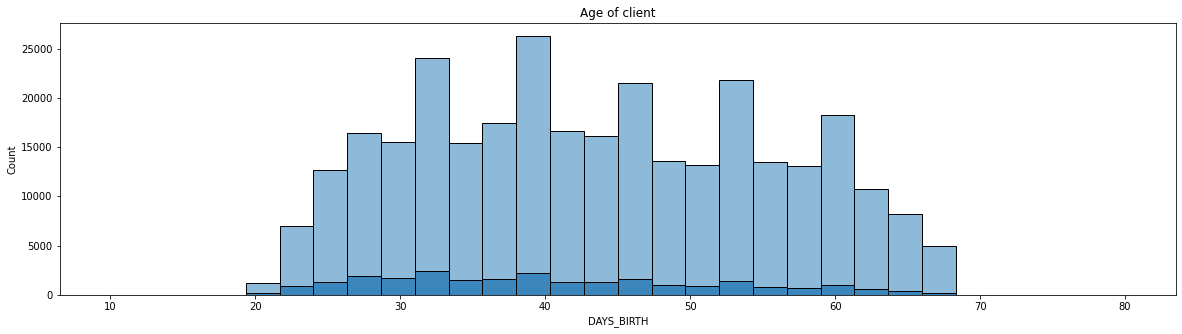

In [9]:
plt.figure(figsize=(20, 5))
sns.histplot((application['DAYS_BIRTH'] // -365), bins = 30,binrange=[10,80],alpha=.5)
sns.histplot((application[application['TARGET'] == 1]['DAYS_BIRTH'] // -365), bins = 30,binrange=[10,80]).set_title('Age of client')

(5.0, 85.0)

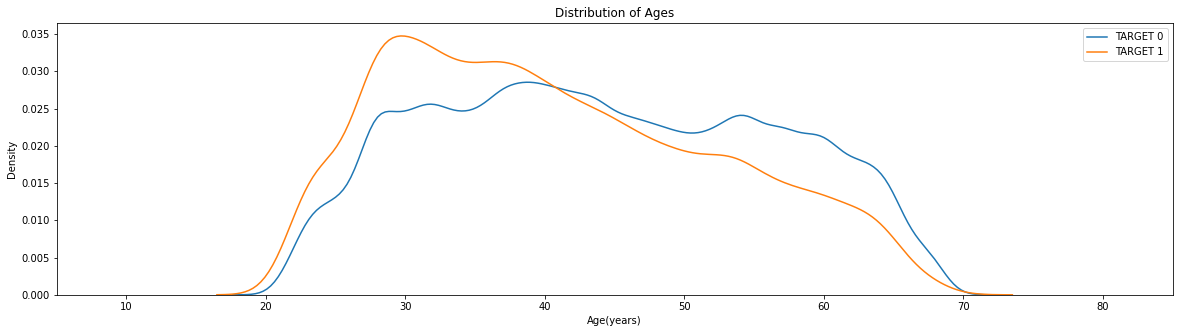

In [10]:
plt.figure(figsize = (20, 5))
sns.kdeplot(application[application['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(application[application['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.xlim([5,85])

* <strong>Famille des clients (tous / credit accordé)</strong>

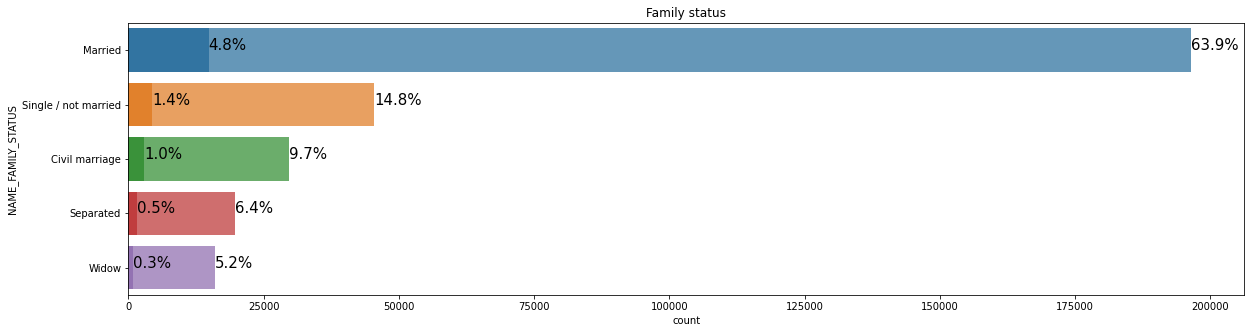

In [11]:
plot_stat(data=application,feature='NAME_FAMILY_STATUS',title="Family status",target=True)

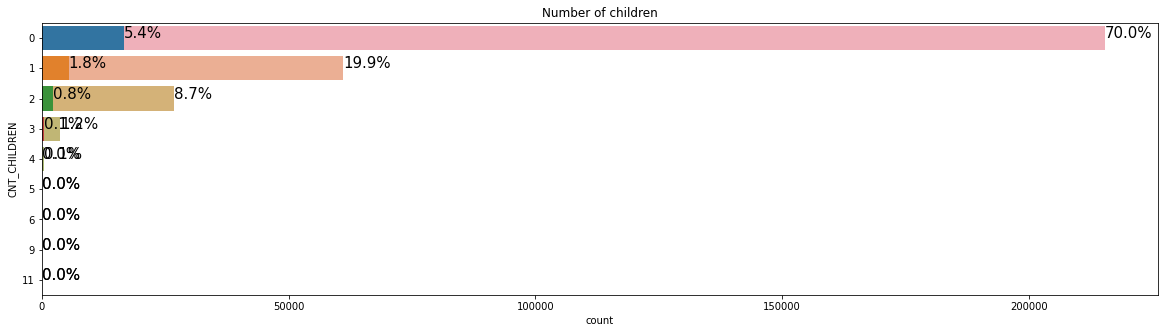

In [12]:
plot_stat(data=application,feature='CNT_CHILDREN',title="Number of children",target=True)

* <strong>Autres caractéristiques des clients (tous / credit accordé)</strong>

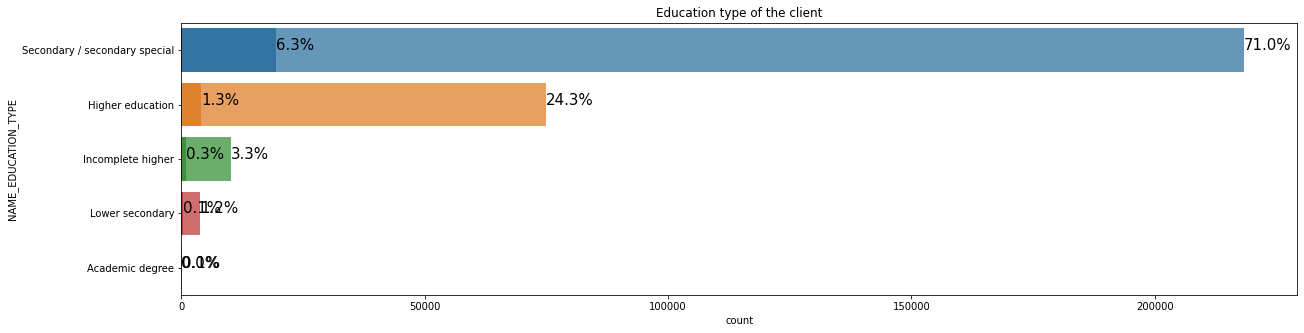

In [13]:
plot_stat(data=application,feature='NAME_EDUCATION_TYPE',title="Education type of the client",target=True)

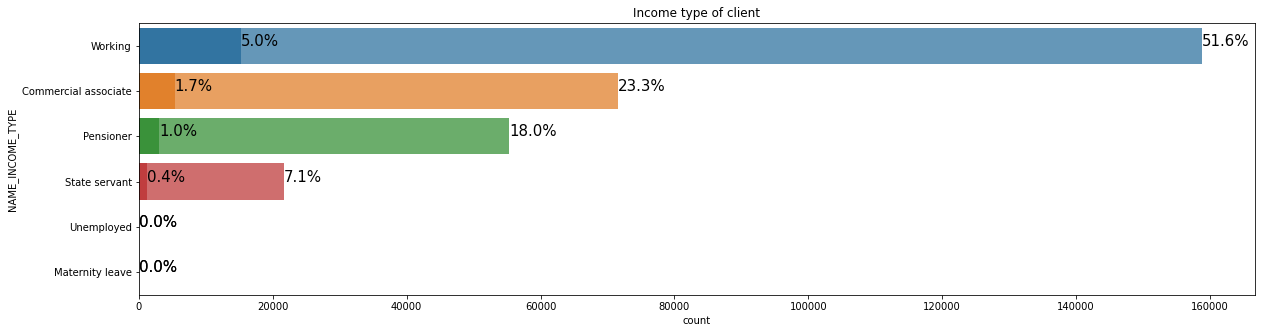

In [14]:
plot_stat(data=application,feature='NAME_INCOME_TYPE',title="Income type of client",target=True)

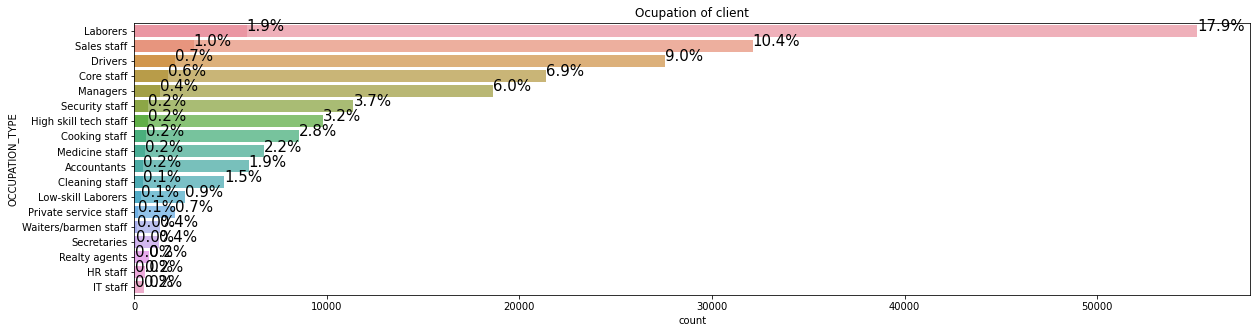

In [15]:
plot_stat(data=application,feature='OCCUPATION_TYPE',title="Ocupation of client",target=True)

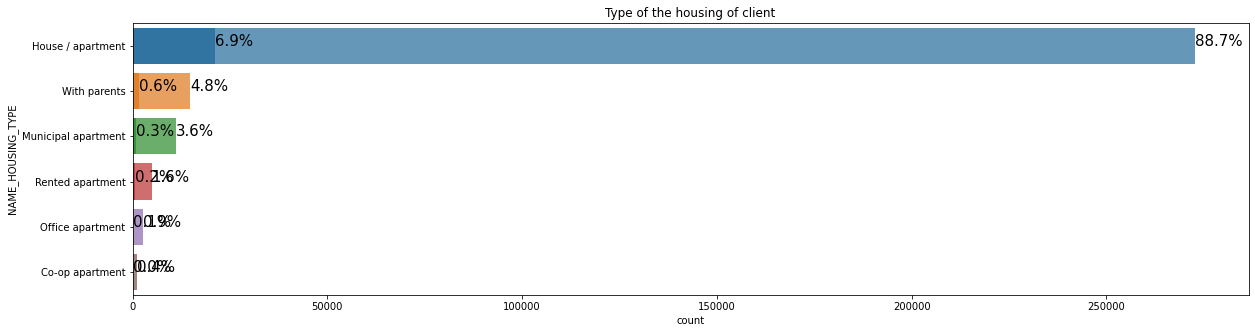

In [16]:
plot_stat(data=application,feature='NAME_HOUSING_TYPE',title="Type of the housing of client",target=True)

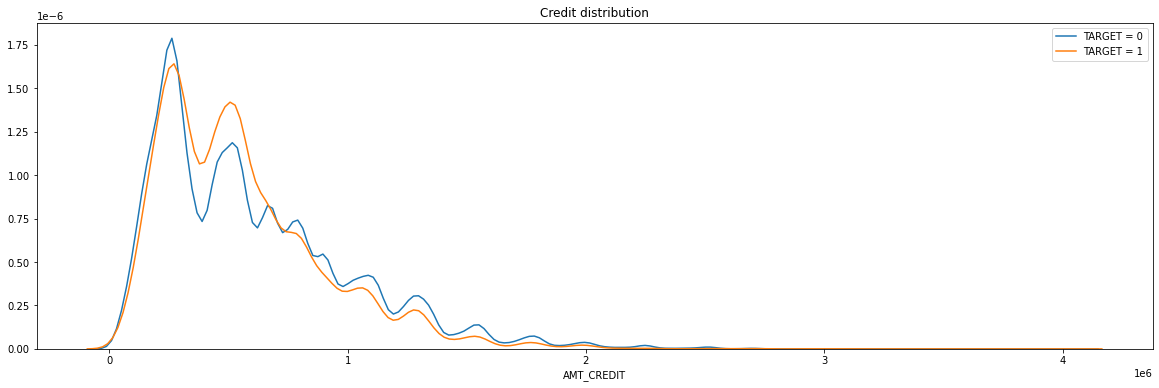

In [17]:
plot_dist(data=application,feature='AMT_CREDIT', title="Credit distribution")

* <strong>Corrélation des features</strong>

<AxesSubplot:>

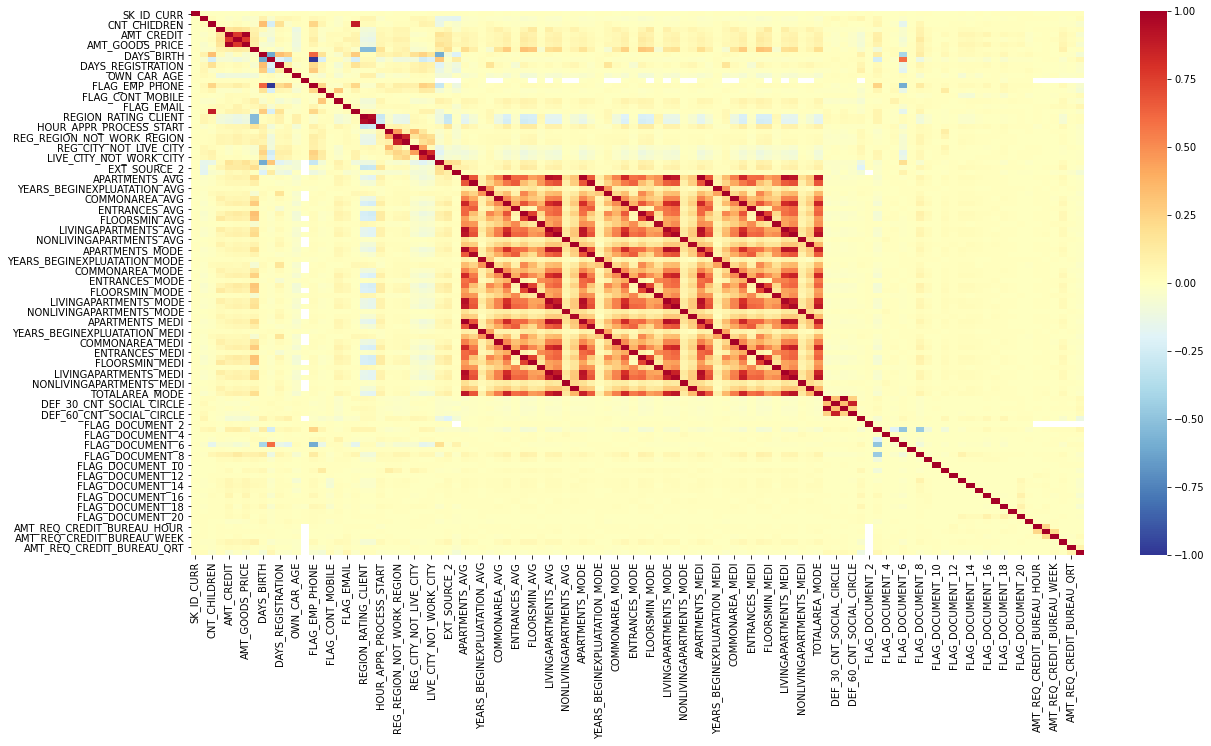

In [18]:
plt.figure(figsize = (20,10))
sns.heatmap(application.corr(),cmap=plt.cm.RdYlBu_r,vmin=-1,vmax=1)